In [2]:
#import required libraries 
import pandas as pd
import numpy as np
import matplotlib as plt
#read CSV file
df=pd.read_csv('m1_survey_data.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11552 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11552 non-null  int64  
 1   MainBranch              11552 non-null  object 
 2   Hobbyist                11552 non-null  object 
 3   OpenSourcer             11552 non-null  object 
 4   OpenSource              11471 non-null  object 
 5   Employment              11552 non-null  object 
 6   Country                 11552 non-null  object 
 7   Student                 11499 non-null  object 
 8   EdLevel                 11436 non-null  object 
 9   UndergradMajor          10812 non-null  object 
 10  EduOther                11388 non-null  object 
 11  OrgSize                 11454 non-null  object 
 12  DevType                 11485 non-null  object 
 13  YearsCode               11543 non-null  object 
 14  Age1stCode              11539 non-null

In [4]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11552.000000,1.073700e+04,1.073000e+04,11427.000000,9083.000000,11255.000000
mean,12362.212517,7.499932e+05,1.313340e+05,42.051851,4.762829,30.772394
std,7271.939210,9.639522e+06,2.943245e+05,24.528561,4.548401,7.392780
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6011.500000,2.500000e+04,2.672700e+04,40.000000,2.000000,25.000000
50%,12323.500000,6.500000e+04,5.774400e+04,40.000000,4.000000,29.000000
75%,18686.500000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       547
Ethnicity       683
Dependents      144
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64


In [6]:

# Drop columns with too many missing values (if more than 50% missing)
df_cleaned = df.dropna(thresh=len(df) * 0.5, axis=1)

In [7]:
# Fill missing values where applicable (for example, with the mode for categorical columns)
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())
df_cleaned['JobSat'] = df_cleaned['JobSat'].fillna(df_cleaned['JobSat'].mode()[0])

# Confirm changes
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11552 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11552 non-null  int64  
 1   MainBranch              11552 non-null  object 
 2   Hobbyist                11552 non-null  object 
 3   OpenSourcer             11552 non-null  object 
 4   OpenSource              11471 non-null  object 
 5   Employment              11552 non-null  object 
 6   Country                 11552 non-null  object 
 7   Student                 11499 non-null  object 
 8   EdLevel                 11436 non-null  object 
 9   UndergradMajor          10812 non-null  object 
 10  EduOther                11388 non-null  object 
 11  OrgSize                 11454 non-null  object 
 12  DevType                 11485 non-null  object 
 13  YearsCode               11543 non-null  object 
 14  Age1stCode              11539 non-null

In [11]:
# Descriptive statistics for numeric columns
print(df_cleaned.describe())

# Summary for categorical columns
print(df_cleaned.describe(include=['O']))


         Respondent     CompTotal  ConvertedComp   WorkWeekHrs   CodeRevHrs  \
count  11552.000000  1.073700e+04   1.073000e+04  11427.000000  9083.000000   
mean   12362.212517  7.499932e+05   1.313340e+05     42.051851     4.762829   
std     7271.939210  9.639522e+06   2.943245e+05     24.528561     4.548401   
min        4.000000  0.000000e+00   0.000000e+00      3.000000     0.000000   
25%     6011.500000  2.500000e+04   2.672700e+04     40.000000     2.000000   
50%    12323.500000  6.500000e+04   5.774400e+04     40.000000     4.000000   
75%    18686.500000  1.200000e+05   1.000000e+05     43.000000     5.000000   
max    25142.000000  7.000000e+08   2.000000e+06   1012.000000    99.000000   

                Age  
count  11552.000000  
mean      30.726827  
std        7.302509  
min       16.000000  
25%       26.000000  
50%       29.000000  
75%       34.000000  
max       99.000000  
                            MainBranch Hobbyist OpenSourcer  \
count                      

In [12]:
# Check for duplicates
duplicate_rows = df_cleaned[df_cleaned.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Drop duplicates if any
df_cleaned = df_cleaned.drop_duplicates()


Number of duplicate rows: 154


In [14]:
# Explore unique values in key columns
print(df_cleaned['Country'].value_counts())
print(df_cleaned['DevType'].value_counts())
print(df_cleaned['YearsCode'].value_counts())
print(df_cleaned['JobSat'].value_counts())


Country
United States        3127
India                 897
United Kingdom        821
Germany               708
Canada                432
                     ... 
Liechtenstein           1
Rwanda                  1
Brunei Darussalam       1
Cape Verde              1
Iraq                    1
Name: count, Length: 135, dtype: int64
DevType
Developer, full-stack                                                                                                                                                                                                                                                                           1472
Developer, back-end                                                                                                                                                                                                                                                                              752
Developer, back-end;Developer, front-end;Developer, full-stack           

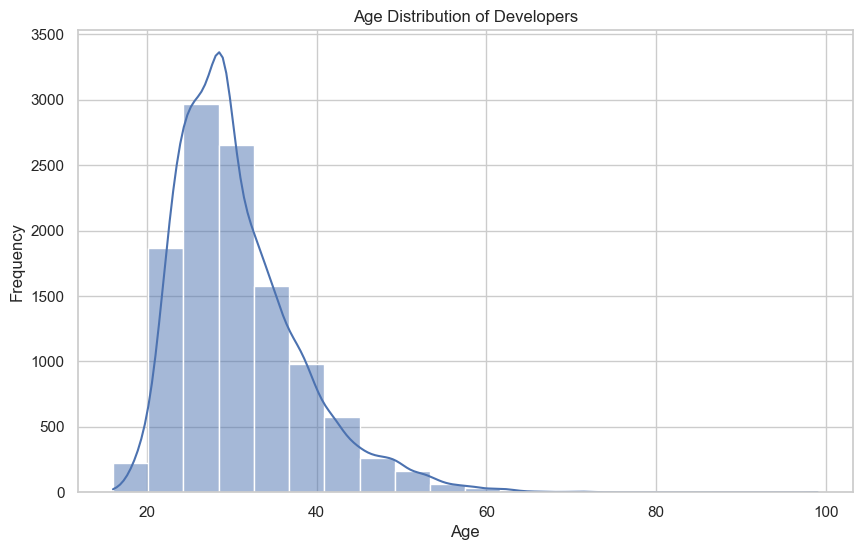

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme for seaborn
sns.set_theme(style="whitegrid")

# 1. Age Distribution of Developers
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], bins=20, kde=True)
plt.title('Age Distribution of Developers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




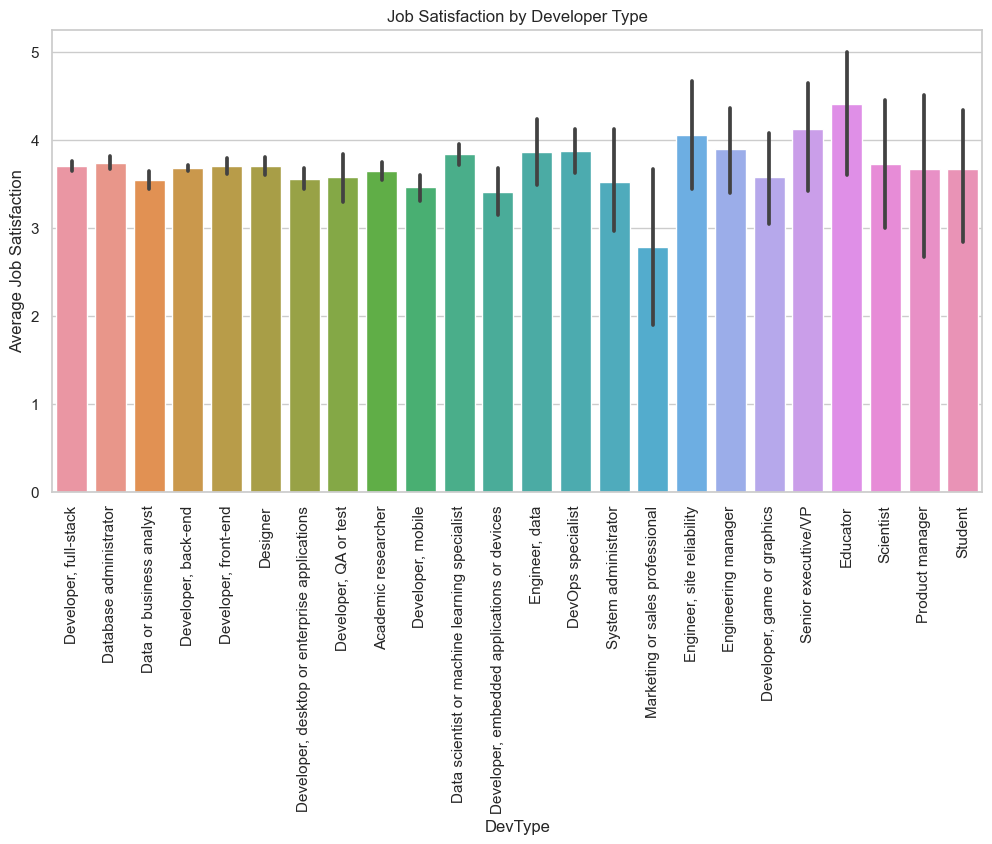

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert the 'JobSat' column into numeric values (e.g., 'Very satisfied' = 5)
job_satisfaction_mapping = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied': 2,
    'Very dissatisfied': 1
}

# Apply the mapping to the 'JobSat' column
df_cleaned['JobSatNumeric'] = df_cleaned['JobSat'].map(job_satisfaction_mapping)

# Ensure 'DevType' is split and handled if it contains multiple types per row
df_cleaned['DevType'] = df_cleaned['DevType'].str.split(';').str[0]  # Taking the first listed developer type

# Plotting Job Satisfaction by Developer Type using np.mean as estimator
plt.figure(figsize=(12, 6))
sns.barplot(x='DevType', y='JobSatNumeric', data=df_cleaned, estimator=np.mean)
plt.title('Job Satisfaction by Developer Type')
plt.xticks(rotation=90)
plt.ylabel('Average Job Satisfaction')
plt.show()


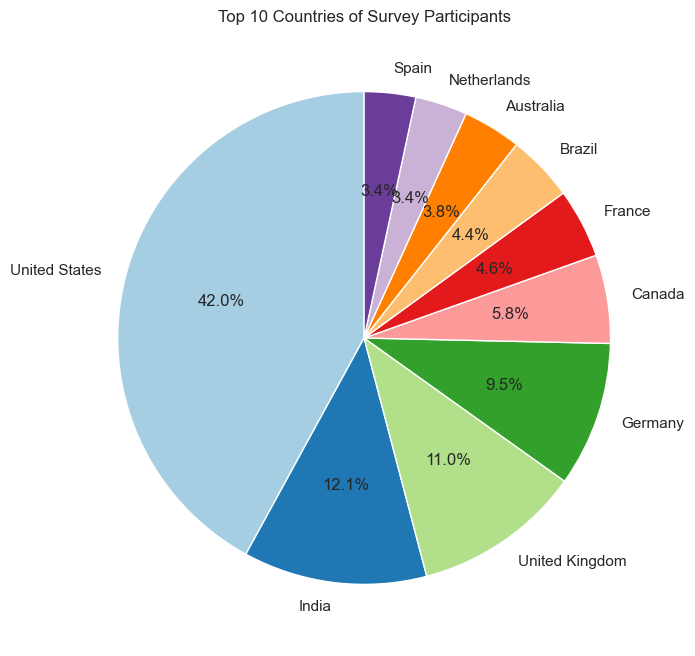

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is already available from earlier steps

# Get the top 10 countries based on the value counts
top_10_countries = df_cleaned['Country'].value_counts().head(10)

# Create the pie chart
plt.figure(figsize=(8, 8))
top_10_countries.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Customize the chart
plt.title('Top 10 Countries of Survey Participants')
plt.ylabel('')  # Remove the 'Country' label for cleaner visualization
plt.show()
